In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('IPL_Dataset.csv')

In [3]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [4]:
#1. What is the total number of runs scored by each batting team?
df.groupby(by='batting_team')['total_runs'].sum()

batting_team
Chennai Super Kings            20899
Deccan Chargers                11463
Delhi Daredevils               21953
Gujarat Lions                   4862
Kings XI Punjab                23068
Kochi Tuskers Kerala            1901
Kolkata Knight Riders          21965
Mumbai Indians                 24521
Pune Warriors                   6358
Rajasthan Royals               17703
Rising Pune Supergiant          2470
Rising Pune Supergiants         2063
Royal Challengers Bangalore    23436
Sunrisers Hyderabad            11652
Name: total_runs, dtype: int64

In [5]:
#2. How many wides have been bowled by each bowling team?
df.groupby(by='bowling_team')['wide_runs'].sum()

bowling_team
Chennai Super Kings            526
Deccan Chargers                328
Delhi Daredevils               614
Gujarat Lions                  107
Kings XI Punjab                668
Kochi Tuskers Kerala            56
Kolkata Knight Riders          658
Mumbai Indians                 786
Pune Warriors                  174
Rajasthan Royals               586
Rising Pune Supergiant          69
Rising Pune Supergiants         77
Royal Challengers Bangalore    725
Sunrisers Hyderabad            268
Name: wide_runs, dtype: int64

In [7]:
#3. What is the average number of runs scored per inning by each team?
#df.groupby(by='inning')['total_runs'].mean()
df.groupby(by='batting_team')['total_runs'].mean()

batting_team
Chennai Super Kings            1.326584
Deccan Chargers                1.268873
Delhi Daredevils               1.277451
Gujarat Lions                  1.363432
Kings XI Punjab                1.311129
Kochi Tuskers Kerala           1.201643
Kolkata Knight Riders          1.274885
Mumbai Indians                 1.294462
Pune Warriors                  1.168106
Rajasthan Royals               1.272316
Rising Pune Supergiant         1.300000
Rising Pune Supergiants        1.305696
Royal Challengers Bangalore    1.325716
Sunrisers Hyderabad            1.286377
Name: total_runs, dtype: float64

In [11]:
#4. Which batsman has scored the highest number of runs?
#df.groupby(by='batsman')['batsman_runs'].max().sort_values(ascending=False).head(1)
df.groupby(by='batsman')['batsman_runs'].sum().sort_values(ascending=False).head(1)
df.groupby(by='batsman')['batsman_runs'].sum().idxmax()

'SK Raina'

In [14]:
#5. How many dismissals have occurred of each dismissal kind?
#df['dismissal_kind'].value_counts()
df.groupby('dismissal_kind').size()

dismissal_kind
bowled                   1382
caught                   4373
caught and bowled         211
hit wicket                  9
lbw                       455
obstructing the field       1
retired hurt                9
run out                   755
stumped                   243
dtype: int64

In [15]:
#6. What is the total runs scored by each over?
df.groupby(by='over')['total_runs'].sum()


over
1      7733
2      8993
3      9852
4     10207
5     10227
6     10397
7      8413
8      8966
9      9247
10     9047
11     9456
12     9694
13     9713
14     9900
15    10240
16    10397
17    10817
18    10899
19    10469
20     9647
Name: total_runs, dtype: int64

In [26]:
7#. Which bowler has taken the most wickets?
#df.columns
#df.groupby(by='bowler')['dismissal_kind'].value_counts()
df[df['dismissal_kind'].notnull()].groupby('bowler').size().sort_values(ascending=False).head(1) #ANSWER

bowler
SL Malinga    170
dtype: int64

In [30]:
#8. How many super overs have been played in total?
df['is_super_over'].sum()

81

In [5]:
#9. What is the average number of extras (wide runs,bye runs,legbye runs, noball runs, penalty runs)
#   conceded per inning by each bowling team?

# df.groupby(by='bowling_team')[['wide_runs','bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs']].sum()
# df.groupby('bowling_team')['wide_runs','bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs'].sum().mean(axis=1)

df.groupby('bowling_team')['wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs'].sum().mean(axis=1)

ValueError: Cannot subset columns with a tuple with more than one element. Use a list instead.

In [37]:
#10. How many runs have been scored by each batsman-bowler pair?
df.groupby(['batsman', 'bowler'])['batsman_runs'].sum()

batsman         bowler         
A Ashish Reddy  A Nehra             7
                AB Dinda            9
                AD Mathews         25
                AD Russell          4
                Anureet Singh       2
                                   ..
Z Khan          SR Watson           3
                Shakib Al Hasan     3
                Sohail Tanvir       3
                VRV Singh           0
                YK Pathan           1
Name: batsman_runs, Length: 17151, dtype: int64

In [43]:
#11. What is the most common dismissal kind?
df.groupby(by='dismissal_kind')['dismissal_kind'].value_counts().sort_values(ascending=False).head(1)
#df['dismissal_kind'].mode() #Answer


dismissal_kind
caught    4373
Name: count, dtype: int64

In [48]:
#12. How many matches have been played by each batting team?
#df.groupby(by='batting_team')['inning'].value_counts()
df.groupby('batting_team')['match_id'].nunique()

batting_team
Chennai Super Kings            131
Deccan Chargers                 75
Delhi Daredevils               147
Gujarat Lions                   30
Kings XI Punjab                148
Kochi Tuskers Kerala            14
Kolkata Knight Riders          148
Mumbai Indians                 157
Pune Warriors                   45
Rajasthan Royals               117
Rising Pune Supergiant          16
Rising Pune Supergiants         14
Royal Challengers Bangalore    152
Sunrisers Hyderabad             76
Name: match_id, dtype: int64

In [50]:
#13. What is the average number of runs scored in each over?
df.groupby(by='over')['total_runs'].mean()
#df.groupby('over')['total_runs'].mean()

over
1     0.955635
2     1.121601
3     1.242057
4     1.291698
5     1.298832
6     1.321933
7     1.074869
8     1.149635
9     1.189325
10    1.170981
11    1.233177
12    1.269347
13    1.275509
14    1.313694
15    1.373206
16    1.418031
17    1.495300
18    1.561685
19    1.600031
20    1.707736
Name: total_runs, dtype: float64

In [53]:
#14. Which fielder has been involved in the most dismissals?
# df.groupby(by='fielder')['dismissal_kind'].value_counts().sort_values(ascending=False).head(1)
df.groupby('fielder').size().nlargest(1)

fielder
KD Karthik    127
dtype: int64

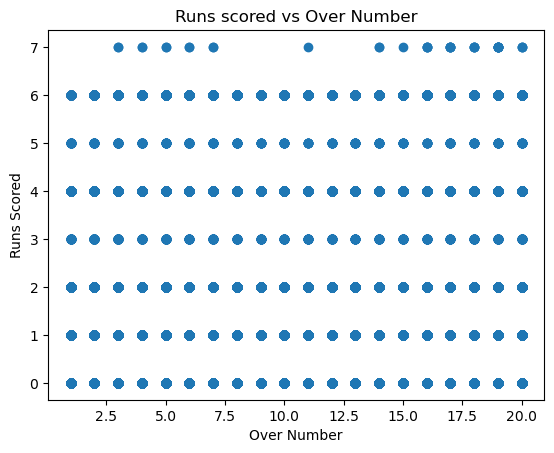

In [56]:
#15. How does the number of runs scored vary with the over number?
plt.scatter(df['over'], df['total_runs'])
plt.xlabel('Over Number')
plt.ylabel('Runs Scored')
plt.title('Runs scored vs Over Number')
plt.show()

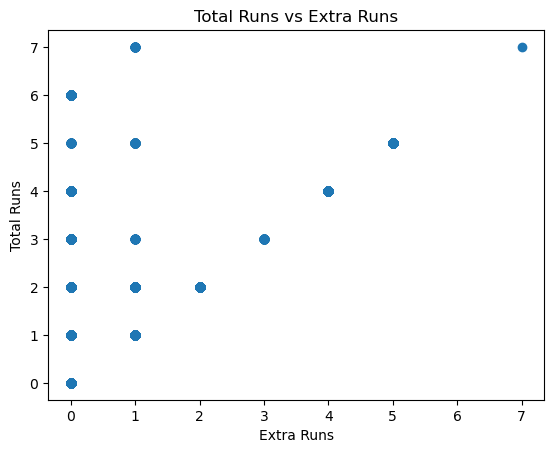

In [58]:
#16. how is the relationship between the number of
# runs scored and the number of extras conceded?
plt.scatter(df['extra_runs'], df['total_runs'])
plt.xlabel('Extra Runs')
plt.ylabel('Total Runs')
plt.title('Total Runs vs Extra Runs')
plt.show()

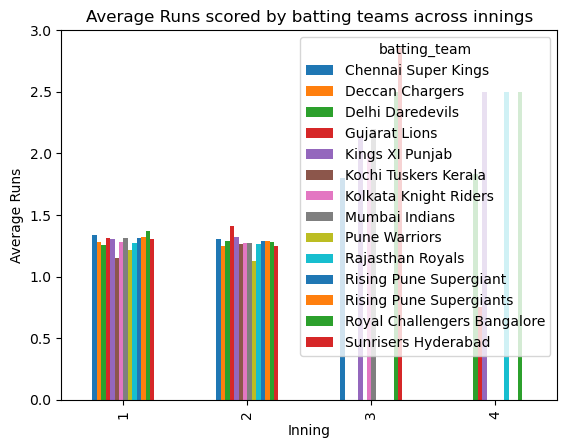

In [59]:
#17. Are there any notable trends in the distribution of
# runs scored by batting teams across innings?

runs_distribution_across_innings = df.groupby(['inning', 'batting_team'])['total_runs'].mean().unstack().plot(kind='bar')
plt.xlabel('Inning')
plt.ylabel('Average Runs')
plt.title('Average Runs scored by batting teams across innings')
plt.show()

In [63]:
#18. Which batting team has the highest average runs per match?
#df.groupby(by='batting_team')['total_runs'].sum().sort_values(ascending=False).head(1)

df.groupby('over').apply(lambda x: x['dismissal_kind'].notnull().sum()) #Answer

over
1     266
2     299
3     321
4     308
5     331
6     327
7     264
8     268
9     307
10    299
11    320
12    317
13    314
14    358
15    372
16    410
17    451
18    565
19    586
20    755
dtype: int64

In [66]:
#19. What is the total runs scored by each batsman?
# df.groupby(by='batsman')['batsman_runs'].sum().sort_values(ascending=False).head(1)

#df.groupby('batting_team')['total_runs'].sum()
df.groupby('batting_team')['match_id'].nunique()

batting_team
Chennai Super Kings            131
Deccan Chargers                 75
Delhi Daredevils               147
Gujarat Lions                   30
Kings XI Punjab                148
Kochi Tuskers Kerala            14
Kolkata Knight Riders          148
Mumbai Indians                 157
Pune Warriors                   45
Rajasthan Royals               117
Rising Pune Supergiant          16
Rising Pune Supergiants         14
Royal Challengers Bangalore    152
Sunrisers Hyderabad             76
Name: match_id, dtype: int64

In [67]:
#20. How does the average number of runs scored per
# inning vary across different bowling teams?
df[df['is_super_over'] == 1]['match_id'].nunique()

7

In [68]:
#21. how is the relationship between the number of
# wides and the number of no balls bowled?
df.groupby('batsman')['total_runs'].sum()

batsman
A Ashish Reddy     288
A Chandila           4
A Chopra            58
A Choudhary         25
A Flintoff          72
                  ... 
YV Takawale        207
Yashpal Singh       49
Younis Khan          3
Yuvraj Singh      2710
Z Khan             121
Name: total_runs, Length: 461, dtype: int64

In [76]:
#22. Which batting team has the highest number of centuries?
df[df['batsman_runs'] >= 100].groupby('batting_team').size()

Series([], dtype: int64)

In [75]:
#23. How does the number of wides vary with the over number?
df.groupby('over')['wide_runs'].sum()

over
1     481
2     442
3     359
4     295
5     279
6     307
7     330
8     261
9     255
10    227
11    182
12    220
13    241
14    224
15    248
16    254
17    264
18    271
19    264
20    238
Name: wide_runs, dtype: int64

In [74]:
#24. What is the average number of runs scored per inning in matches with a super over?
df[df['is_super_over'] == 1].groupby('batting_team')['total_runs'].mean()

batting_team
Chennai Super Kings            1.800000
Delhi Daredevils               1.833333
Gujarat Lions                  0.750000
Kings XI Punjab                2.272727
Kolkata Knight Riders          2.000000
Mumbai Indians                 2.200000
Rajasthan Royals               2.500000
Royal Challengers Bangalore    2.500000
Sunrisers Hyderabad            2.857143
Name: total_runs, dtype: float64

In [6]:
#25. How does the number of extras vary with the over number?
df.groupby('over')['wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs'].sum().sum(axis=1)

ValueError: Cannot subset columns with a tuple with more than one element. Use a list instead.

In [70]:
#26. Which bowler has the highest economy rate?
df.groupby('bowler').apply(lambda x: x['total_runs'].sum() / len(x)).sort_values(ascending=False)

bowler
I Malhotra      3.833333
LPC Silva       3.500000
B Chipli        3.333333
V Shankar       3.166667
P Prasanth      3.000000
                  ...   
AM Rahane       0.833333
Sachin Baby     0.800000
NB Singh        0.720000
N Rana          0.500000
AC Gilchrist    0.000000
Length: 356, dtype: float64

In [71]:
#27. How does the number of dismissals vary across different dismissal kinds?
df.groupby('dismissal_kind').size()

dismissal_kind
bowled                   1382
caught                   4373
caught and bowled         211
hit wicket                  9
lbw                       455
obstructing the field       1
retired hurt                9
run out                   755
stumped                   243
dtype: int64

In [72]:
#28. What is the distribution of runs scored by each batting team in super overs?
df[df['is_super_over'] == 1].groupby('batting_team')['total_runs'].sum()

batting_team
Chennai Super Kings             9
Delhi Daredevils               11
Gujarat Lions                   6
Kings XI Punjab                25
Kolkata Knight Riders          26
Mumbai Indians                 11
Rajasthan Royals               35
Royal Challengers Bangalore    30
Sunrisers Hyderabad            20
Name: total_runs, dtype: int64

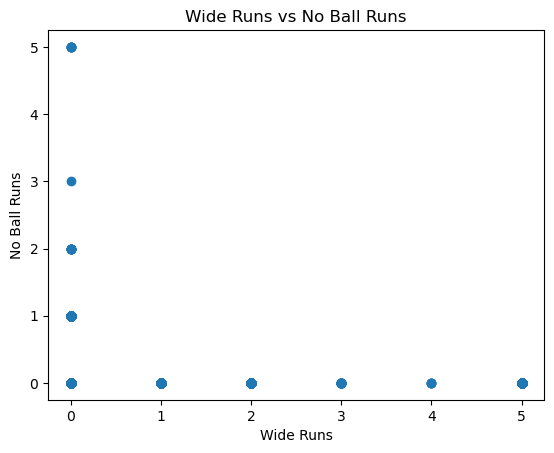

In [77]:
plt.scatter(df['wide_runs'], df['noball_runs'])
plt.xlabel('Wide Runs')
plt.ylabel('No Ball Runs')
plt.title('Wide Runs vs No Ball Runs')
plt.show()